## Problem Statement
The company has
collected details and gathered a lot of
information about individuals. The
management wants to build an intelligent
system from the data to determine the
presence or absence of smoking in a person
through bio-signals.

## Objective -
To build  machine learning model that can classify the presence or absence of
smoking.

#### About the dataset:-

1. ID -index
2. gender- gender of a person (M or F)
3. age - age of a person (5-years gap)
4. height(cm) - height of a person
5. weight(kg) - weight of a person
6. waist(cm) - waist circumference length
7. eyesight(left) - left eyesight
8. eyesight(right) - right eyesight
9. hearing(left) - hearing pulse in left ear
10. hearing(right)-  hearing pulse in right ear
11. systolic - Blood pressure
12. relaxation - Blood pressure
13. fasting - blood sugar Blood test
14. Cholesterol-  total
15. triglyceride - Lipid found in blood
16. HDL - cholesterol type
17. LDL -cholesterol type
18. hemoglobin -  Transporting oxygen in blood
19. Urine protein - Excess of bloodborne proteins in urine
20. serum creatinine - Amount of creatinine in blood
21. AST - glutamic oxaloacetic transaminase type
22. ALT - glutamic oxaloacetic transaminase type
23. Gtp - γ-GTP
24. oral- Oral Examination status
25. dental caries - Tooth decay
26. tartar - tartar status
27. smoking - Smoker (0 or 1)

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("smoking.csv")

In [3]:
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [4]:
# EDA - Exploratory Data Analysis

In [5]:
data.size

1503684

In [6]:
data.shape

(55692, 27)

In [7]:
data.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,55692.0,27845.500000,16077.039933,0.0,13922.75,27845.5,41768.25,55691.0
age,55692.0,44.182917,12.071418,20.0,40.00,40.0,55.00,85.0
height(cm),55692.0,164.649321,9.194597,130.0,160.00,165.0,170.00,190.0
weight(kg),55692.0,65.864936,12.820306,30.0,55.00,65.0,75.00,135.0
waist(cm),55692.0,82.046418,9.274223,51.0,76.00,82.0,88.00,129.0
eyesight(left),55692.0,1.012623,0.486873,0.1,0.80,1.0,1.20,9.9
eyesight(right),55692.0,1.007443,0.485964,0.1,0.80,1.0,1.20,9.9
hearing(left),55692.0,1.025587,0.157902,1.0,1.00,1.0,1.00,2.0
hearing(right),55692.0,1.026144,0.159564,1.0,1.00,1.0,1.00,2.0
systolic,55692.0,121.494218,13.675989,71.0,112.00,120.0,130.00,240.0


In [11]:
import seaborn as sns

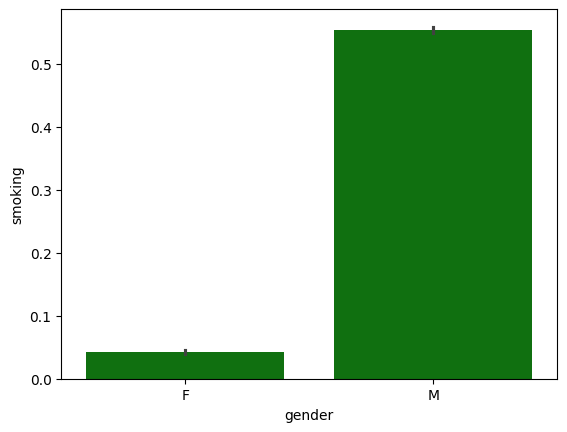

In [12]:
sns.barplot(x = data['gender'], y=data['smoking'], color = 'green')
plt.show()

#### Females tend to smoke less than males. This conclusion is drawn from the classification model's predictions, which consistently show a lower likelihood of smoking among females compared to males. This inference suggests a potential gender disparity in smoking habits, with males exhibiting a higher propensity for smoking behavior.

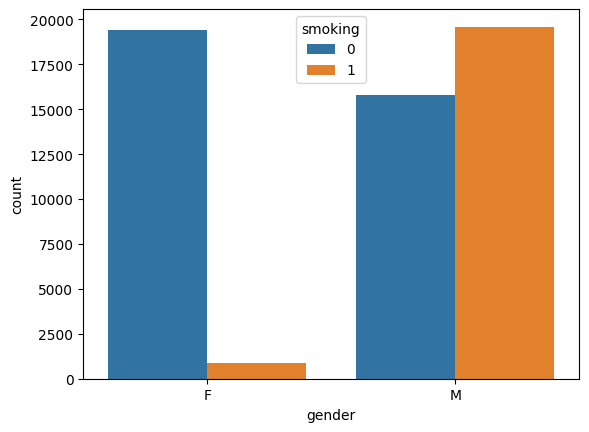

In [13]:
sns.countplot(x = data['gender'], hue = data['smoking'])
plt.show()

<Axes: ylabel='count'>

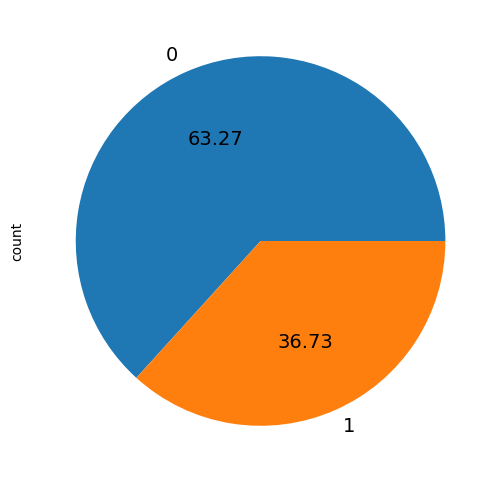

In [14]:
plt.figure(figsize = (15,6))
data["smoking"].value_counts().plot.pie(autopct = '%0.2f',fontsize=14)


#### In the overall dataset, the proportion of individuals who are non-smokers is higher than those who smoke. This inference is drawn from the pie chart representation, which illustrates that a larger portion of the dataset consists of non-smokers compared to smokers. This finding suggests that a significant portion of the population represented in the dataset does not engage in smoking behavior, highlighting a potential trend towards non-smoking lifestyles or health-conscious attitudes within the sampled population.

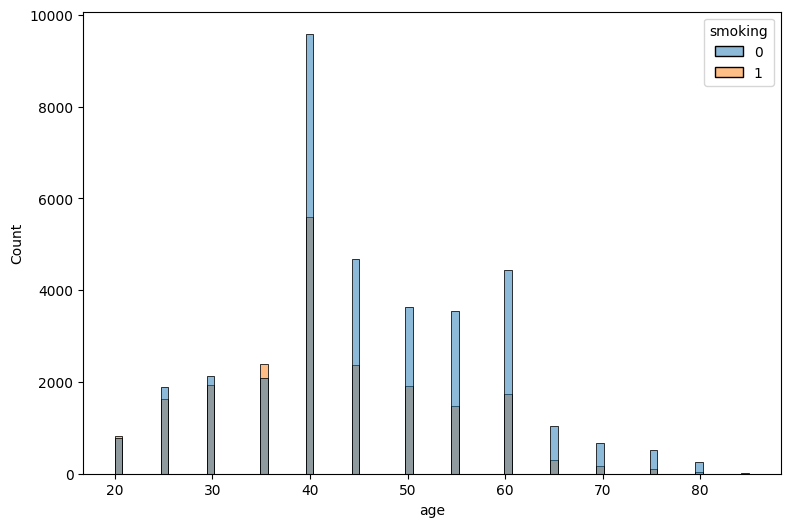

In [15]:
plt.figure(figsize= (9,6))
sns.histplot(x = data['age'], hue =data['smoking'])
plt.show()

#### The analysis of smoking behavior across different age groups reveals that individuals aged 40 exhibit a higher proportion of smokers compared to other age groups in the dataset. This inference is drawn from the bar chart representation, which indicates that the proportion of smokers is notably elevated among individuals aged 40 compared to other age categories.

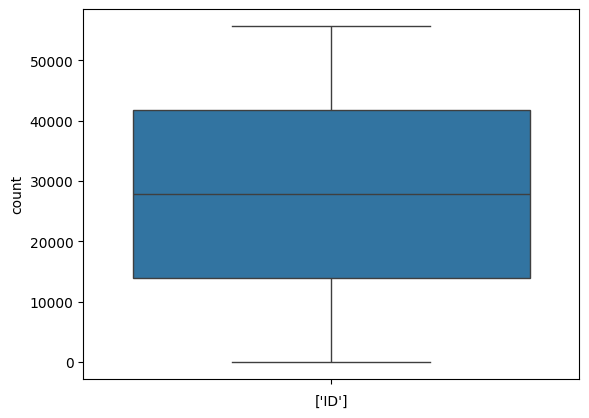

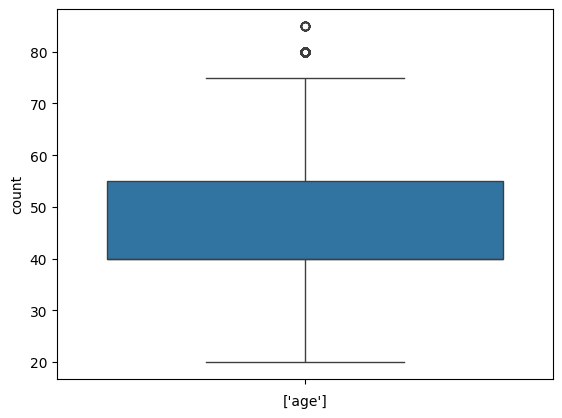

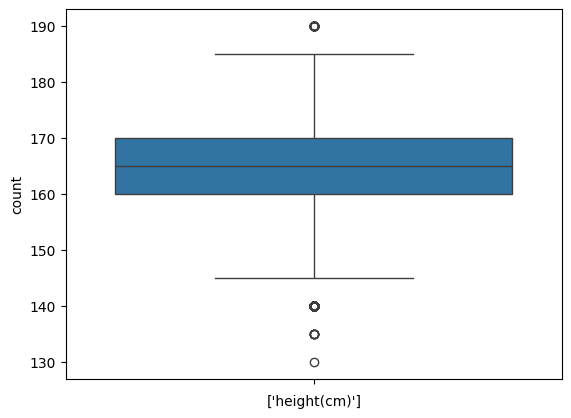

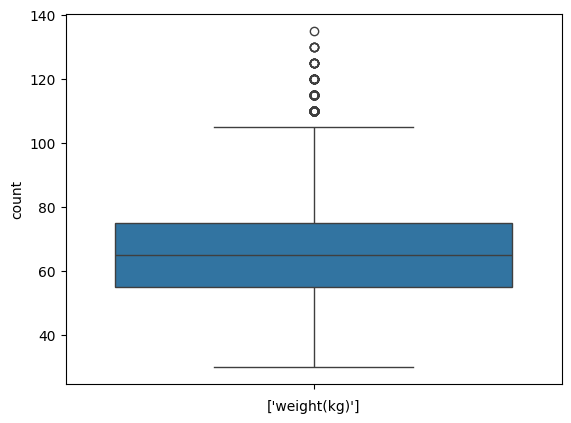

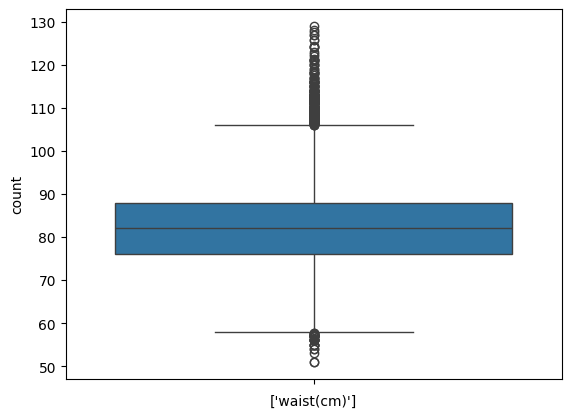

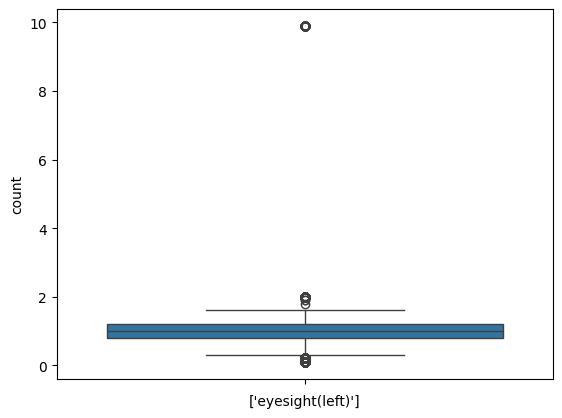

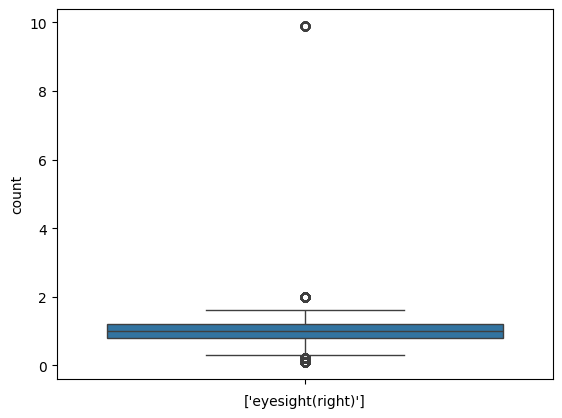

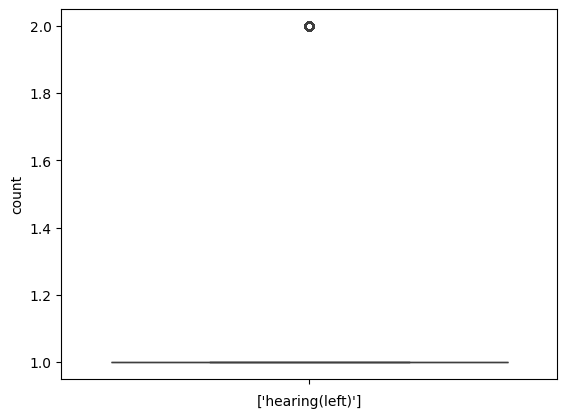

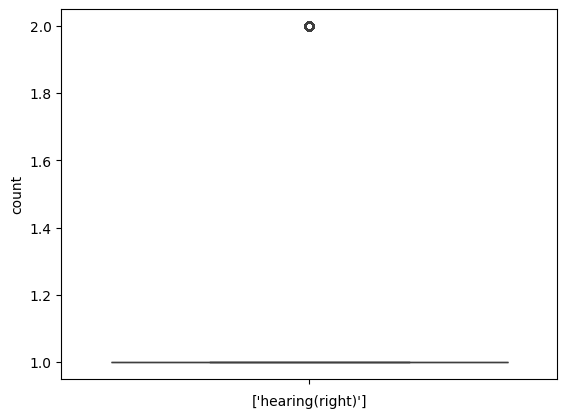

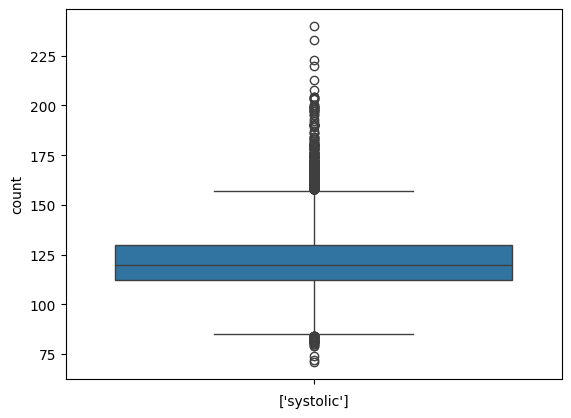

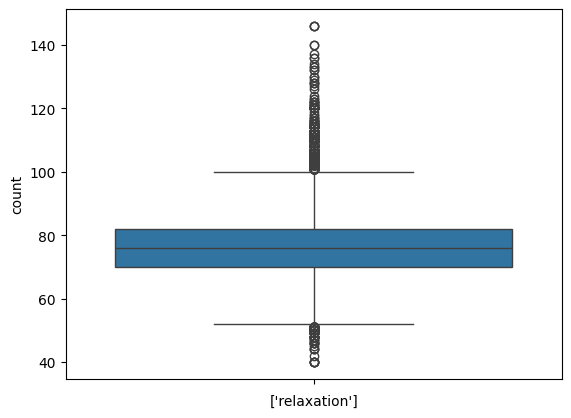

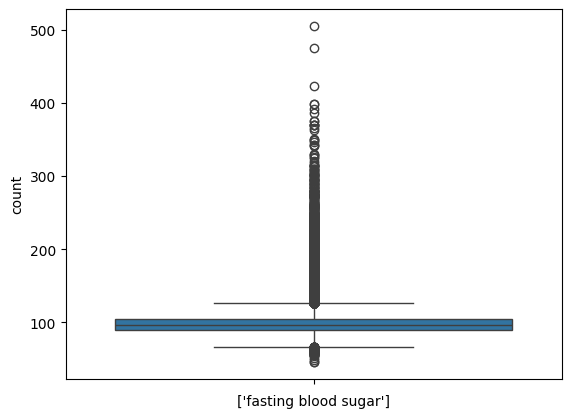

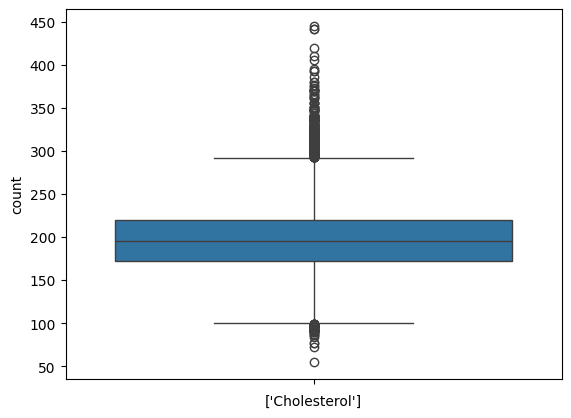

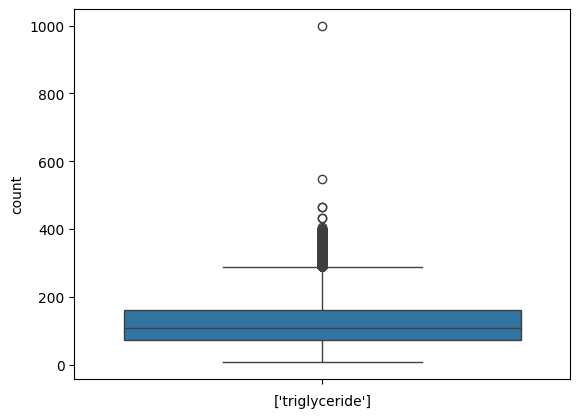

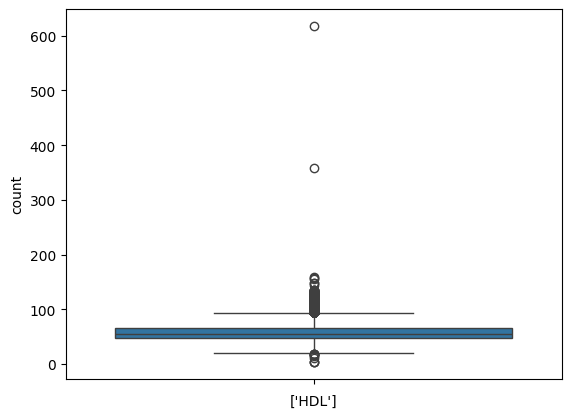

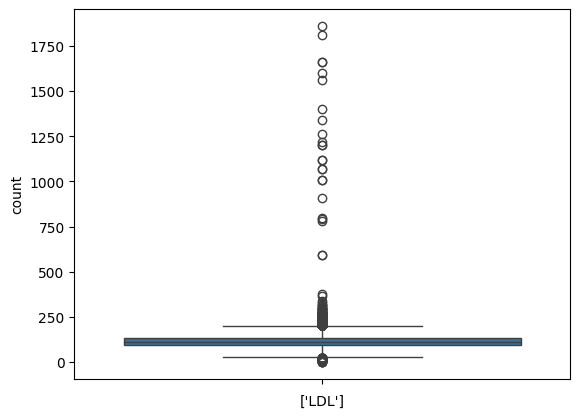

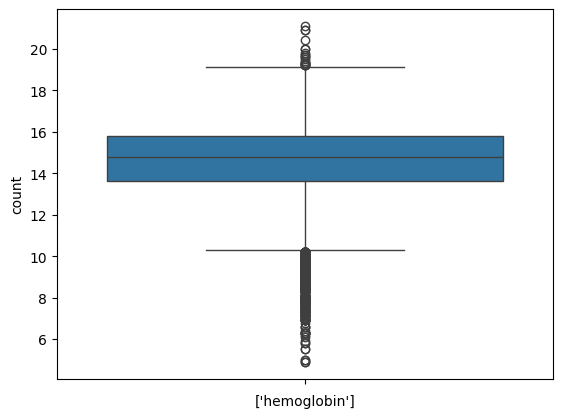

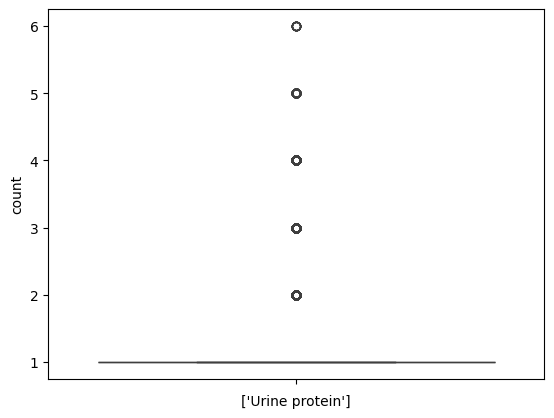

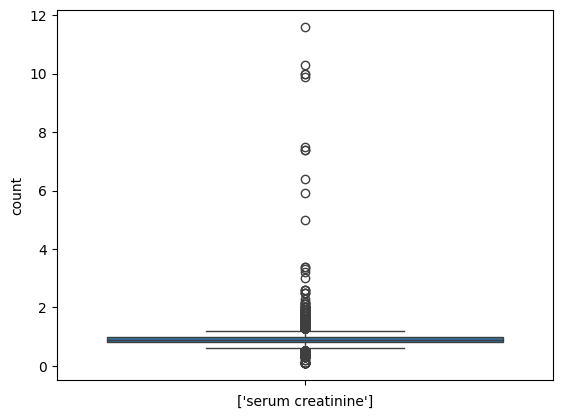

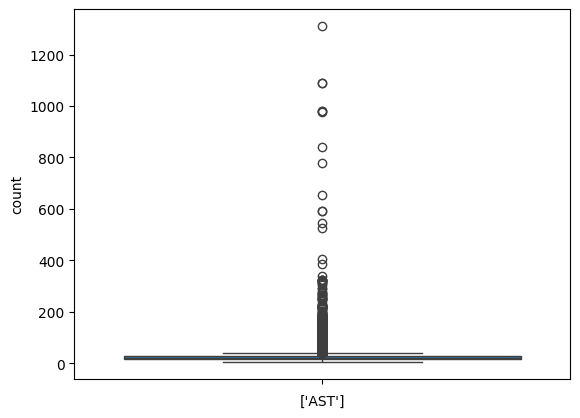

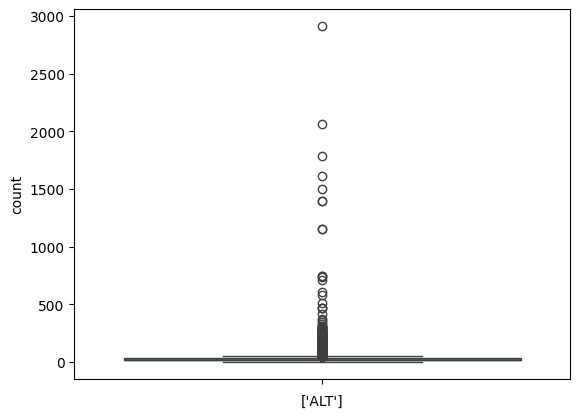

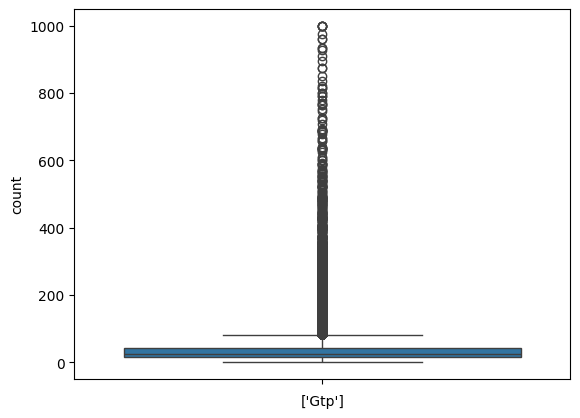

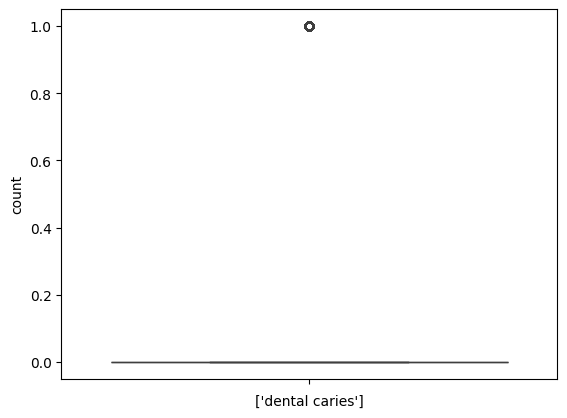

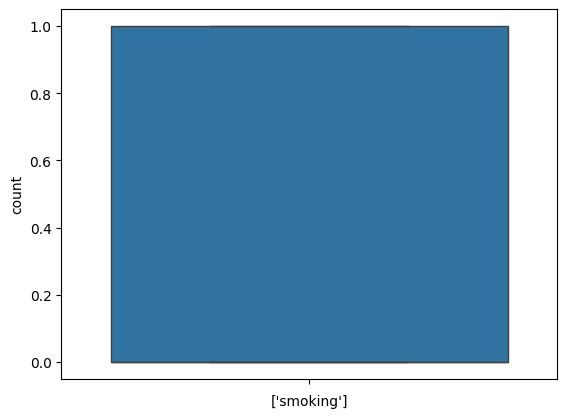

In [16]:
col_list = data.columns

for i in col_list:
  if (data[i].dtypes == 'int64' or data[i].dtypes =='float64'):
    sns.boxplot(data[i])
    plt.xlabel([i])
    plt.ylabel('count')
    plt.show()

#### The presence of outliers within the dataset suggests potential deviations from the typical patterns observed in the data.

#### To overcome this by using the Interquartile Range (IQR) which involves identifying data points that fall outside a specified range beyond the first and third quartiles. These outliers can be treated by either removing them from the dataset or adjusting their values to bring them within a reasonable range, depending on the context of the analysis and the impact of outliers on the results.

In [21]:
numerical_columns = data.select_dtypes(include=['number']).columns
numerical_columns

Index(['ID', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [25]:
outliers = data.loc[:, ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries']]

for i in outliers:
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3 - Q1
  data = data[(data[i] >= Q1 - 1.5*IQR) & (data[i] <= Q3 + 1.5*IQR)]


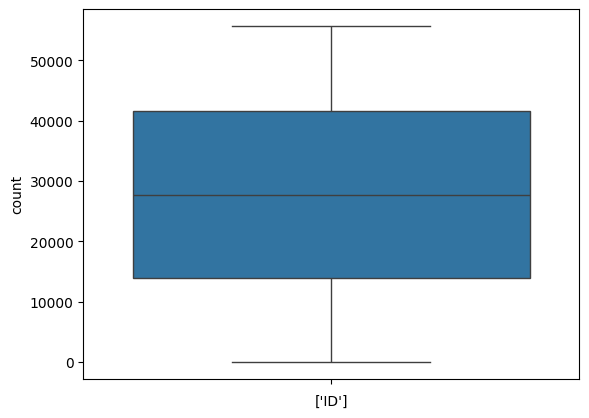

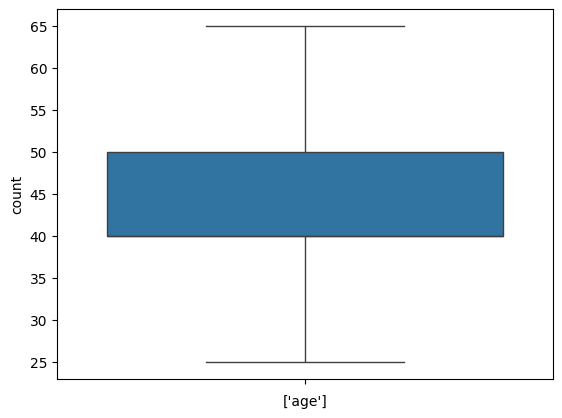

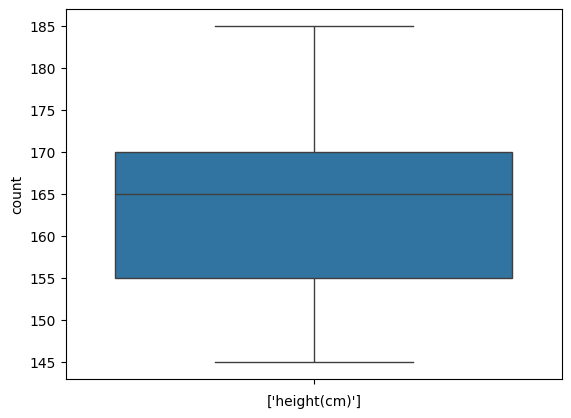

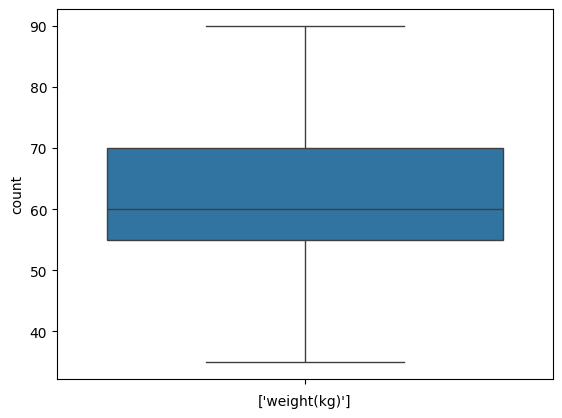

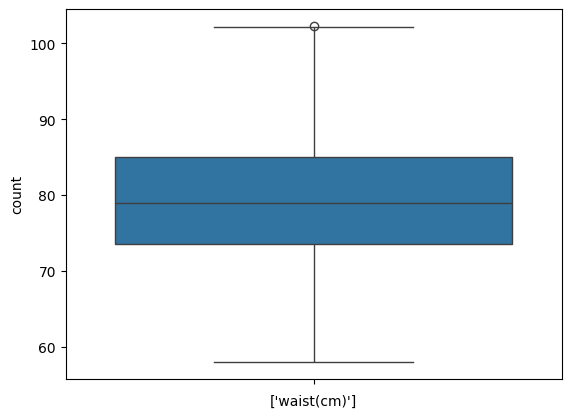

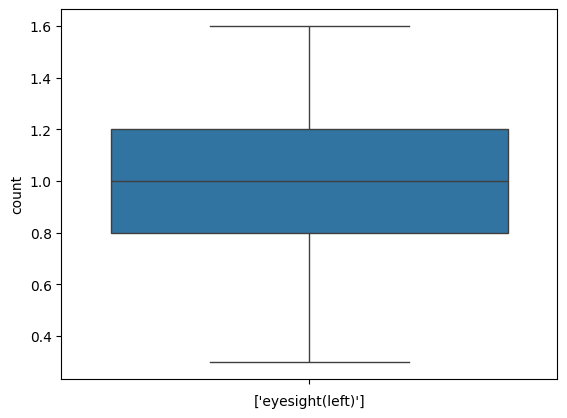

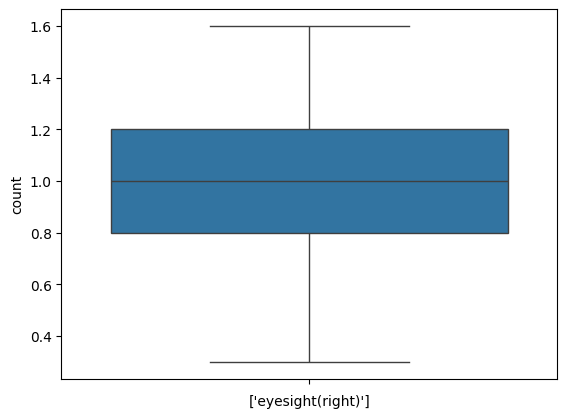

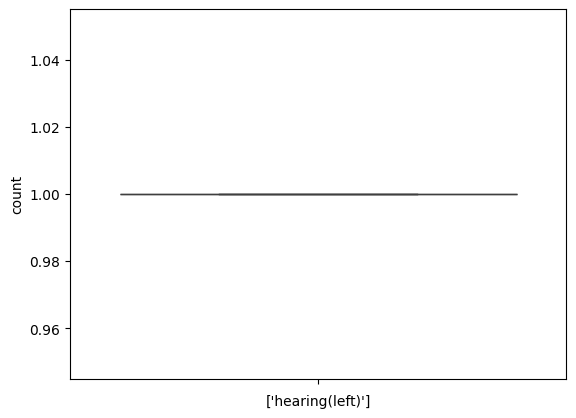

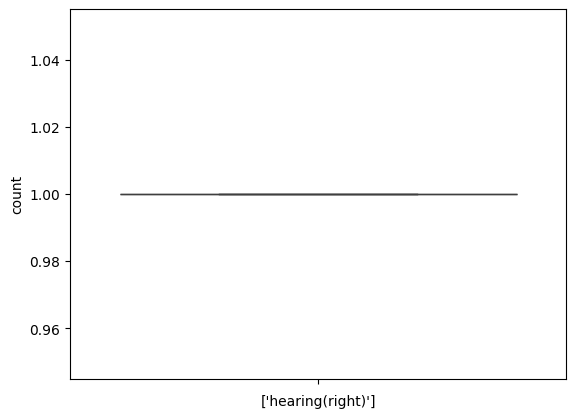

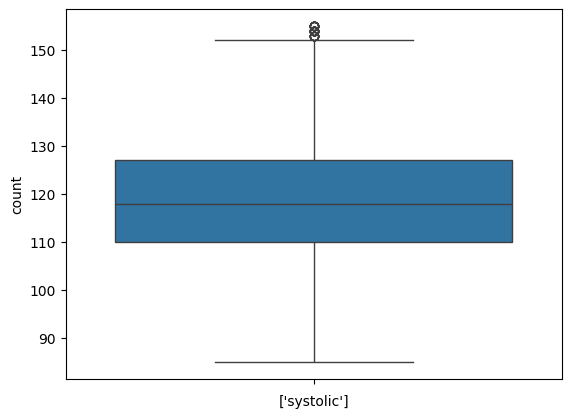

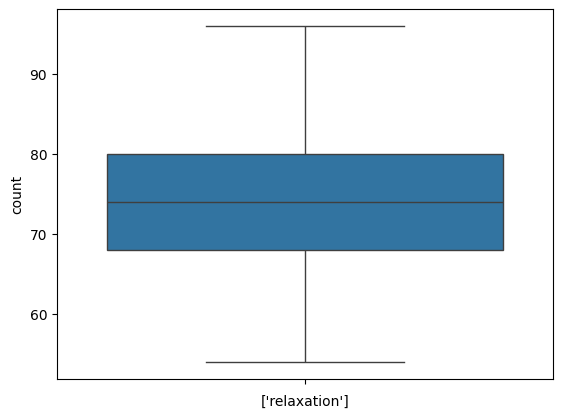

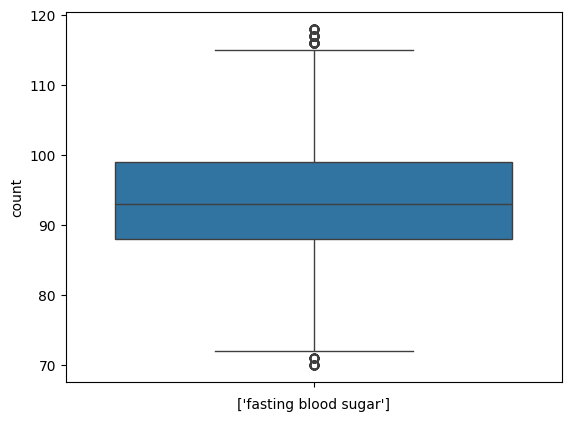

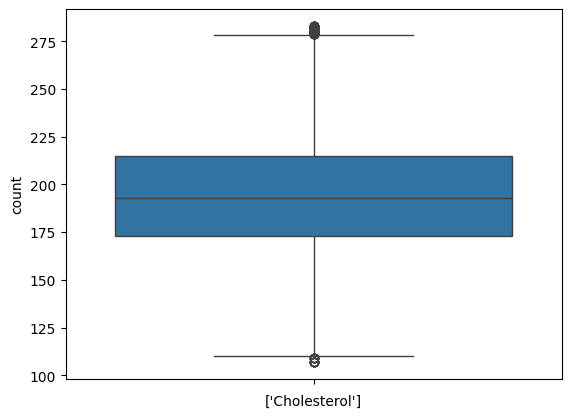

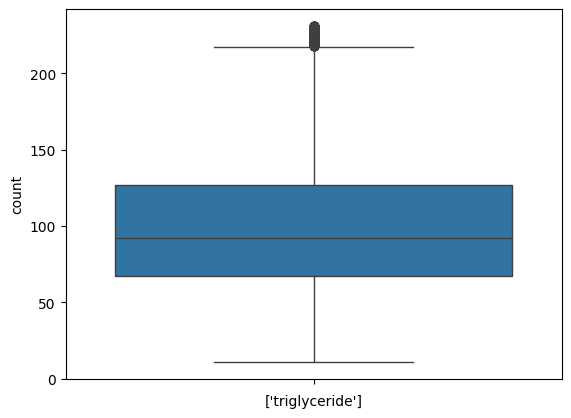

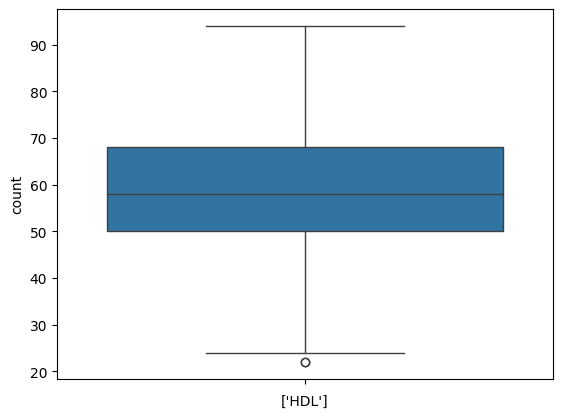

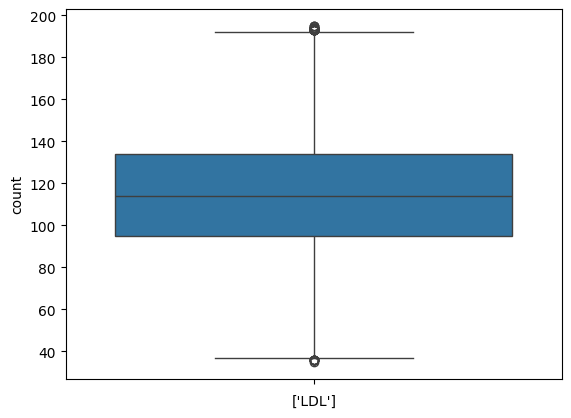

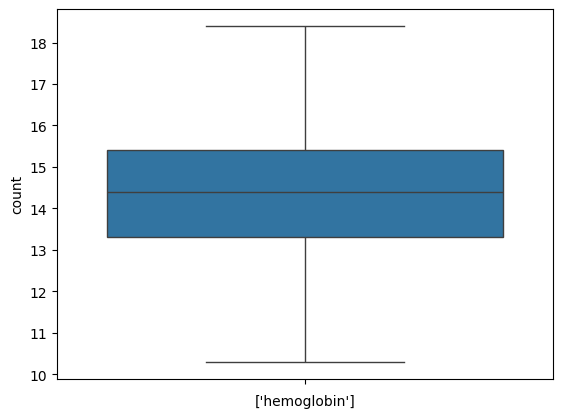

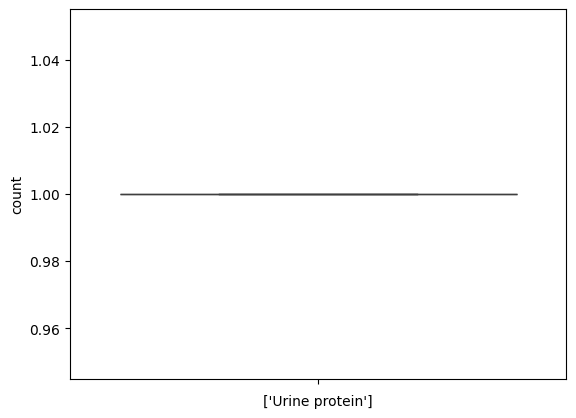

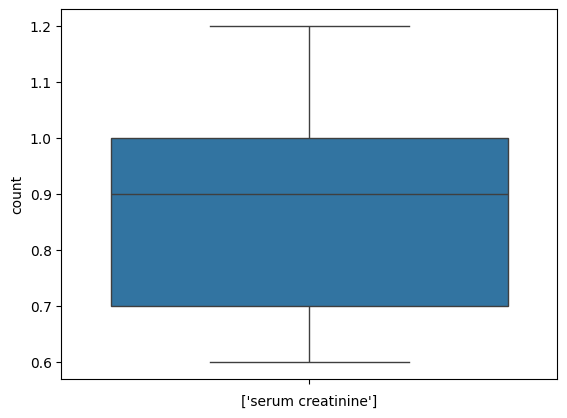

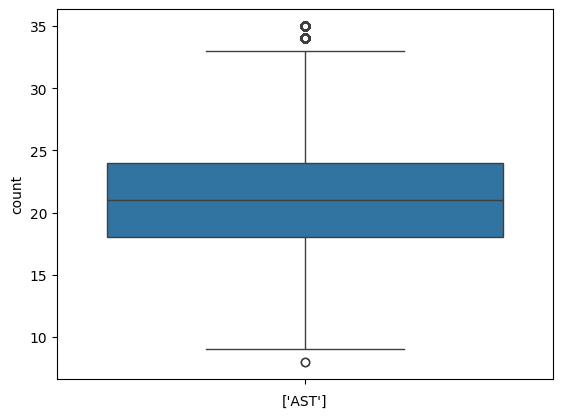

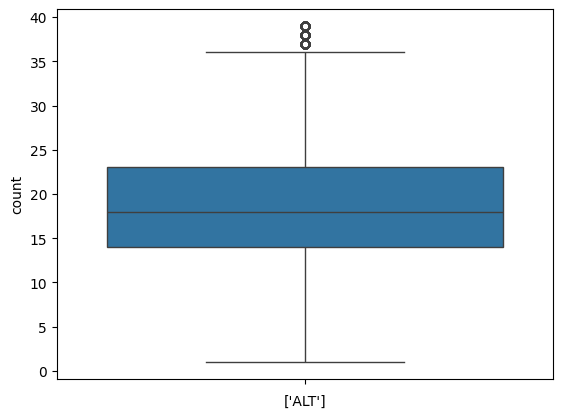

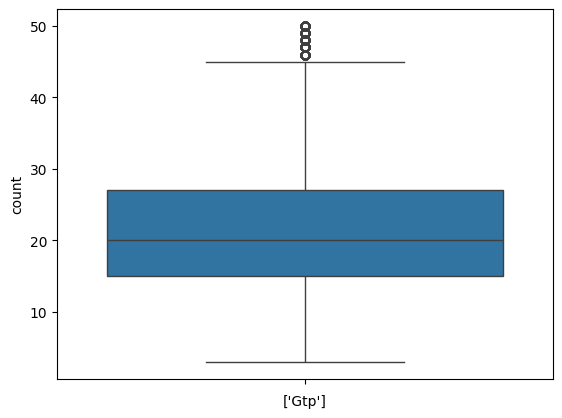

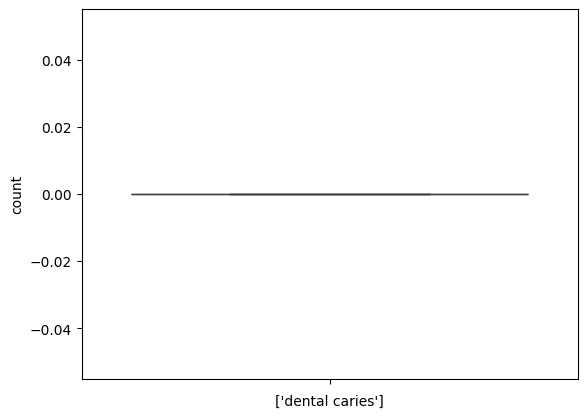

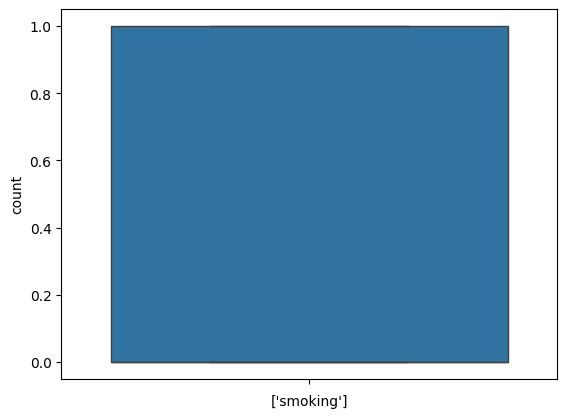

In [26]:
col_list = data.columns

for i in col_list:
  if (data[i].dtypes == 'int64' or data[i].dtypes =='float64'):
    sns.boxplot(data[i])
    plt.xlabel([i])
    plt.ylabel('count')
    plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['tartar'] = le.fit_transform(data['tartar'])
data['oral'] = le.fit_transform(data['oral'])

In [27]:
object_columns = data.select_dtypes(include=['object']).columns

In [28]:
object_columns

Index(['gender', 'oral', 'tartar'], dtype='object')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20245 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   20245 non-null  int64  
 1   gender               20245 non-null  int64  
 2   age                  20245 non-null  int64  
 3   height(cm)           20245 non-null  int64  
 4   weight(kg)           20245 non-null  int64  
 5   waist(cm)            20245 non-null  float64
 6   eyesight(left)       20245 non-null  float64
 7   eyesight(right)      20245 non-null  float64
 8   hearing(left)        20245 non-null  float64
 9   hearing(right)       20245 non-null  float64
 10  systolic             20245 non-null  float64
 11  relaxation           20245 non-null  float64
 12  fasting blood sugar  20245 non-null  float64
 13  Cholesterol          20245 non-null  float64
 14  triglyceride         20245 non-null  float64
 15  HDL                  20245 non-null  floa

### Feature Selection Using feature importance

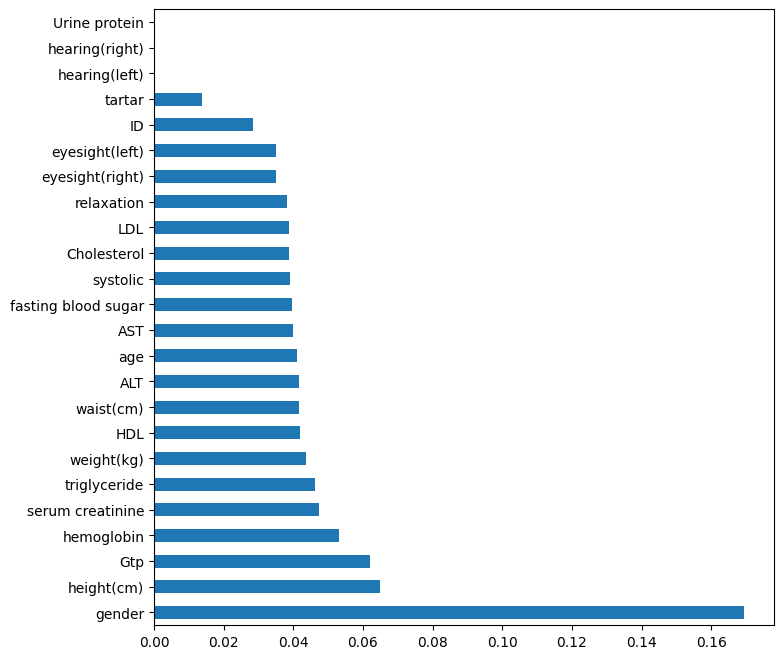

In [34]:
X = data.iloc[:,:-1]
y = data['smoking']
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
data1 = pd.Series(model.feature_importances_,index = X.columns)
plt.figure(figsize = (8,8))
data1.nlargest(24).plot(kind = 'barh')
plt.show()

#### Feature importance is a technique to calculate the score for all the input features for the model.
#### Out of 24 features I will select the top 17 features based on the score.

In [41]:
X = data[['gender', 'height(cm)', 'Gtp', 'hemoglobin', 'serum creatinine', 'triglyceride', 'weight(kg)', 'HDL', 'waist(cm)', 'ALT', 'age', 'AST', 'fasting blood sugar', 'systolic', 'Cholesterol', 'LDL', 'relaxation']]
y = data['smoking']  # Remove extra brackets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy =', accuracy)


Accuracy = 0.7722894541862189


#### Logistic Regression gives 77 % Accuracy.

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2983
           1       0.58      0.49      0.53      1066

    accuracy                           0.77      4049
   macro avg       0.70      0.68      0.69      4049
weighted avg       0.76      0.77      0.77      4049



### Bootstrap Aggregation - Bagging Algorithm

In [45]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier

# Create BaggingClassifier with DecisionTreeClassifier as base estimator
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000)

# Train the BaggingClassifier and evaluate its accuracy on the test set
bagging_clf.fit(x_train, y_train)
accuracy = bagging_clf.score(x_test, y_test)
print("Accuracy:", accuracy)

# Make predictions and print classification report
y_pred = bagging_clf.predict(x_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8399604840701408
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2983
           1       0.72      0.64      0.68      1066

    accuracy                           0.84      4049
   macro avg       0.80      0.77      0.79      4049
weighted avg       0.84      0.84      0.84      4049



####  Bootstrap Aggregation - Bagging Algorithm gives 83% accuracy.

In [47]:
from sklearn.ensemble import ExtraTreesClassifier  # Correct import statement

# Create ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=1000, random_state=42)

# Train the model
et.fit(x_train, y_train)

# Make predictions and print classification report
y_pred = et.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      2983
           1       0.74      0.63      0.68      1066

    accuracy                           0.84      4049
   macro avg       0.81      0.77      0.79      4049
weighted avg       0.84      0.84      0.84      4049



In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000)
rfc.fit(x_train,y_train)
y_pred= rfc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      2983
           1       0.73      0.63      0.68      1066

    accuracy                           0.84      4049
   macro avg       0.80      0.77      0.79      4049
weighted avg       0.84      0.84      0.84      4049

